<a href="https://colab.research.google.com/github/Codeadi01/project-/blob/main/password_strength_assesment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

To load the dataset using Pandas, run this code:

In [ ]:
pswd_data = pd.read_csv("/content/data.csv",error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

To know if our dataset is successfully loaded, run this code:

In [ ]:
pswd_data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


From the image above, our dataset has password and strength columns. The password column holds the password text and the strength columns contain the password strengths.

To check all the password strength values, run this code:

In [ ]:
pswd_data['strength'].unique()

array([1, 2, 0])

From the output above, our password strength has three values. 0 represents the weakest passwords, 1 for medium passwords, and 2 for strongest passwords.

This dataset may have missing values, let’s now check for missing values in our dataset.

In [ ]:
pswd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [ ]:
pswd_data.isna().sum()

password    1
strength    0
dtype: int64

From the image above, our dataset has one missing value. Let’s remove the missing value using the following code:


In [ ]:
pswd_data.dropna(inplace=True)
pswd_data.isnull().sum()

password    0
strength    0
dtype: int64

After removing the missing values, we will convert our dataset into an array.

In [ ]:
pswd = np.array(pswd_data)
pswd

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

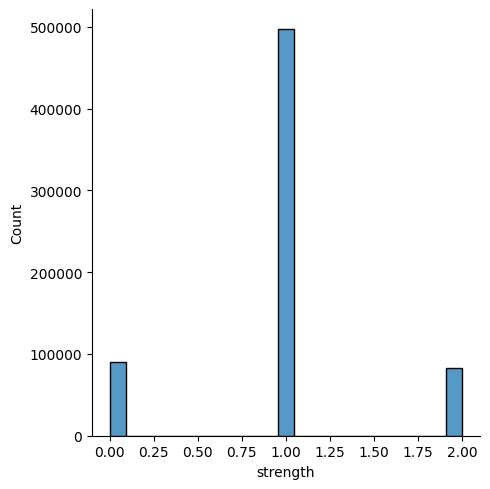

In [ ]:
sns.displot(pswd_data["strength"])

The next step is to shuffle our dataset randomly.
When using a shuffled dataset, the model will understand patterns and relationships within our dataset.

To shuffle our dataset, we will import the random Python package.

In [ ]:
import random

We can now randomly shuffle the dataset using the following code:

In [ ]:
random.shuffle(pswd)

Adding features and labels

 Here, our features are located in the password column. The password column holds all the text passwords that will train our model.

 Labels are variables in our dataset that are used as output for the model. Here, our labels are located in the strength column. The strength column has three values, 0, 1, and 2.

In [ ]:
ylabels  = [s[1] for s in pswd]
allpasswords = [s[0] for s in pswd]

Run the following code to check the number of passwords and labels in our dataset:

Number of labels:

In [ ]:
len(ylabels)

669639

Number of passwords:


In [ ]:
len(allpasswords)

669639

Convert words into characters

In [ ]:
def make_chars(inputs):
    characters=[]
    for letter in inputs:
        characters.append(letter)
    return characters

We will use the TfidfVectorizer package to convert the characters into numeric data (vectors of numbers).

In [ ]:
vectorizer=TfidfVectorizer(tokenizer=make_chars)

Our input data (features) is saved in the allpasswords variable.

In [ ]:
X = vectorizer.fit_transform(allpasswords)

Splitting datasets creates two sets; one will be used for training the model and the other for testing. To split the dataset, we will use train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

We have used a test_size=0.2 so that 80% of the data is used for training and 20% for testing.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

Let’s now build the model!

We will build our model using the DecisionTreeClassifier algorithm.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

To use the algorithm, we will initialize it using the following code:

In [ ]:
clf=DecisionTreeClassifier()

Finally, we fit the algorithm onto the train set dataset. This will ensure that the model fully learns from the dataset. Over time, the model will understand patterns and relationships within our dataset:

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Model testing

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([1, 2, 0, ..., 1, 1, 2])

Accuracy score using the testing dataset

In [ ]:
print("Accuracy :",clf.score(X_test, y_test))

Accuracy : 0.9742548234872469


In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([1, 2, 0, ..., 1, 1, 2])

In [ ]:
print("Accuracy :",clf.score(X_test, y_test))

Accuracy : 0.9742548234872469


**Single prediction**

In a single prediction, we input sample passwords to our model for it to make predictions. We will use the following input passwords:

In [ ]:
X_predict = ['drshsyqb*',
 'python'
 'littledotsK18@#',
 'password##@',
 'ajd1348#28t**',
 'gtddsdsaa',
 'silasaw',
 '123456',
 'abcdef']

The vectorizer.transform method will convert the password text into numeric data. clf.predict method will perform the prediction. print will print the prediction results, as shown below:

In [ ]:
X_predict = vectorizer.transform(X_predict)
y_Predict = clf.predict(X_predict)
print(y_Predict)

[1 2 1 2 2 1 0 0]
